In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
from skimage.io import imread
import cv2
import pickle


In [ ]:
! pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.5 MB/s eta 0:00:00


In [ ]:
# Import the necessary libraries
import pydicom
from PIL import Image

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Data_PS3/Data_tabular/dataset_image.csv")

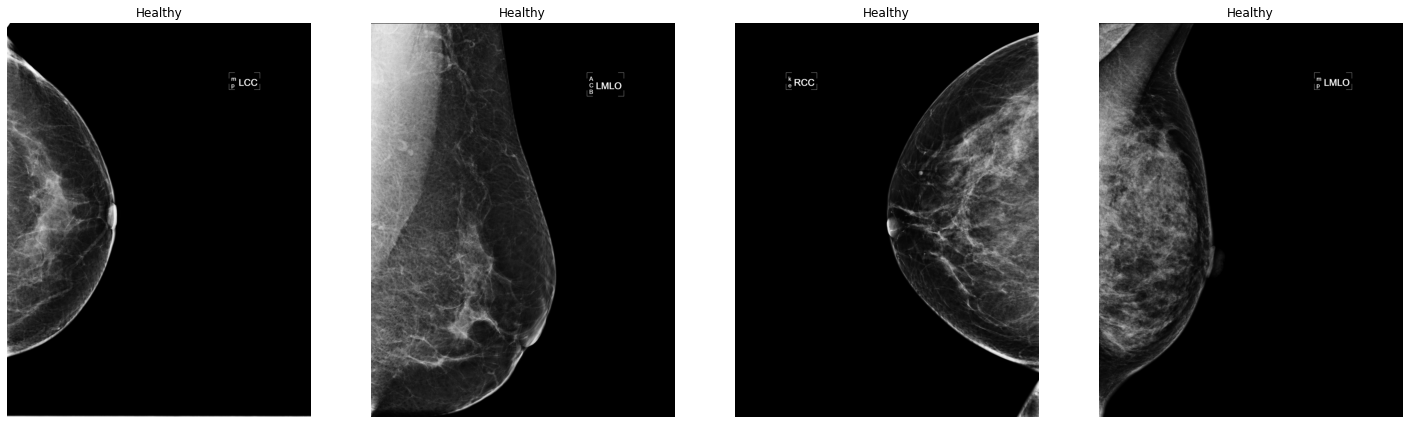

In [ ]:
img_path = '/content/drive/MyDrive/Data_PS3/Data/'

img_name= list(train_df.anon_filename)

img_class=list(train_df.rad_decision)

sel_img=[]
class_=[]
for i in [0,1,4,5]:
  sel_img.append(img_name[i])
  class_.append(img_class[i])

#get the first 5 whale images
images = [(whale_img, whale_label) for (whale_img, whale_label) in zip(sel_img, class_)]

fig, m_axs = plt.subplots(1, len(images), figsize = (25, 15))

#show the images and label them
for ii, c_ax in enumerate(m_axs):
    img=imread(os.path.join(img_path,images[ii][0]))
    c_ax.imshow(img, cmap='gray')
    c_ax.set_title("Healthy")
    c_ax.axis('off')
#plt.savefig('/content/drive/MyDrive/Data_PS3/Save_dir/result/healty1')

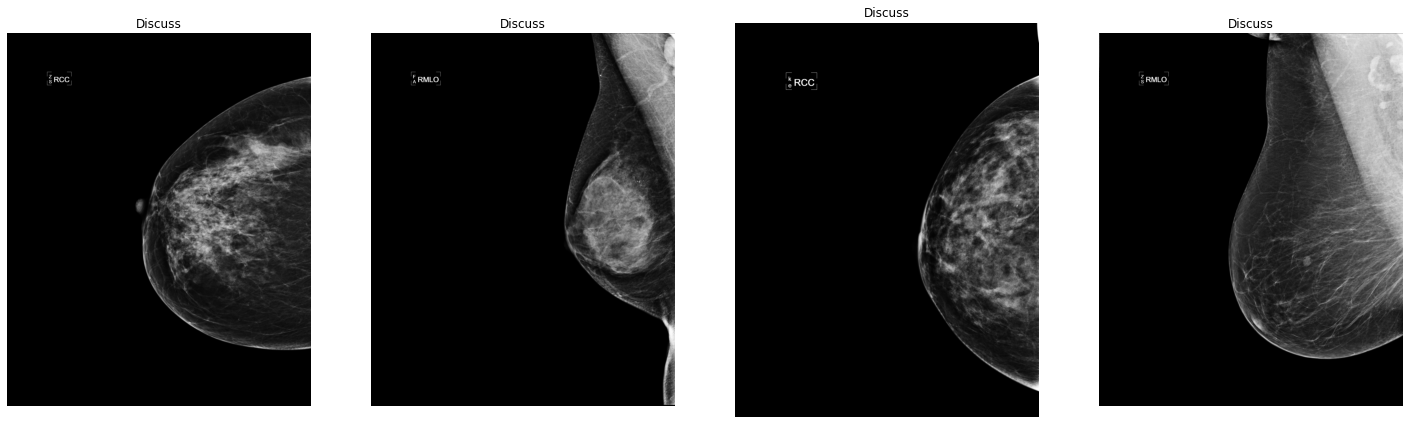

In [ ]:
sel_img=[]
class_=[]
for i in [-1,-2,-3,-5]:
  sel_img.append(img_name[i])
  class_.append(img_class[i])

#get the first 5 whale images
images = [(whale_img, whale_label) for (whale_img, whale_label) in zip(sel_img, class_)]

fig, m_axs = plt.subplots(1, len(images), figsize = (25, 15))

#show the images and label them
for ii, c_ax in enumerate(m_axs):
    img=imread(os.path.join(img_path,images[ii][0]))
    c_ax.imshow(img, cmap='gray')
    c_ax.set_title('Discuss')
    c_ax.axis('off')
plt.savefig('/content/drive/MyDrive/Data_PS3/Save_dir/result/' + "Discuss")

In [ ]:
img_path = '/content/drive/MyDrive/Data_PS3/Data/'

dest_path = "/content/drive/MyDrive/Data_PS3/Image_original/"

img_name= list(train_df.anon_filename)

for img in img_name[:10]:
  # Load the DICOM image using pydicom
  image_path = img_path + img
  
  ds = pydicom.dcmread(image_path)

  # Convert the DICOM image to a NumPy array
  image = ds.pixel_array

  # Convert the NumPy array to a PIL image
  pil_image = Image.fromarray(image)
  
  img= img.replace("dcm", "png")

  dest_file = dest_path + img

  # Save the PIL image in the PNG format
  pil_image.save(dest_file)

Images preprocessing

In [ ]:
def crop(img):
    """
    Crop ROI from image.
    """

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    _, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY)
    
    cnts, _ = cv2.findContours(breast_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(cnts, key = cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)

    return img[y:y+h, x:x+w], breast_mask[y:y+h, x:x+w]

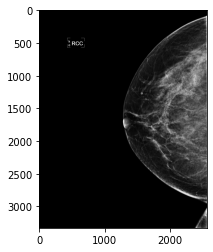

In [ ]:
img=imread(os.path.join(img_path,images[2][0]))
plt.imshow(img, cmap='gray')
pil_image = Image.fromarray(img)
# Save the PIL image in the PNG format
pil_image.save('Unprocessed_image.png')

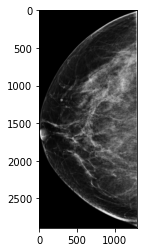

In [ ]:
image, _ = crop(img)
plt.imshow(image, cmap='gray')
# Convert the NumPy array to a PIL image
pil_image = Image.fromarray(image)
# Save the PIL image in the PNG format
pil_image.save("processed_image.png")

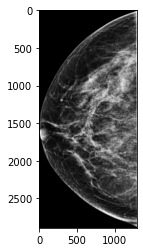

In [ ]:
image = cv2.medianBlur(img, 3)
image, _ = crop(image)
image = clahe(normalize(image), 1)
plt.imshow(image, cmap='gray')
# Convert the NumPy array to a PIL image
pil_image1 = Image.fromarray(image)
pil_image1.save('final_proccessed1.png')

In [ ]:
img_path = '/content/drive/MyDrive/Data_PS3/Data/'

dest_path = "/content/drive/MyDrive/Data_PS3/Image_png/"

img_name= list(train_df.anon_filename)

for img in img_name:
  # Load the DICOM image using pydicom
  image_path = img_path + img
  
  ds = pydicom.dcmread(image_path)

  # Convert the DICOM image to a NumPy array
  image = ds.pixel_array

  image, _ = crop(image)

  # Convert the NumPy array to a PIL image
  pil_image = Image.fromarray(image)
  
  img= img.replace("dcm", "png")

  dest_file = dest_path + img

  # Save the PIL image in the PNG format
  pil_image.save(dest_file)


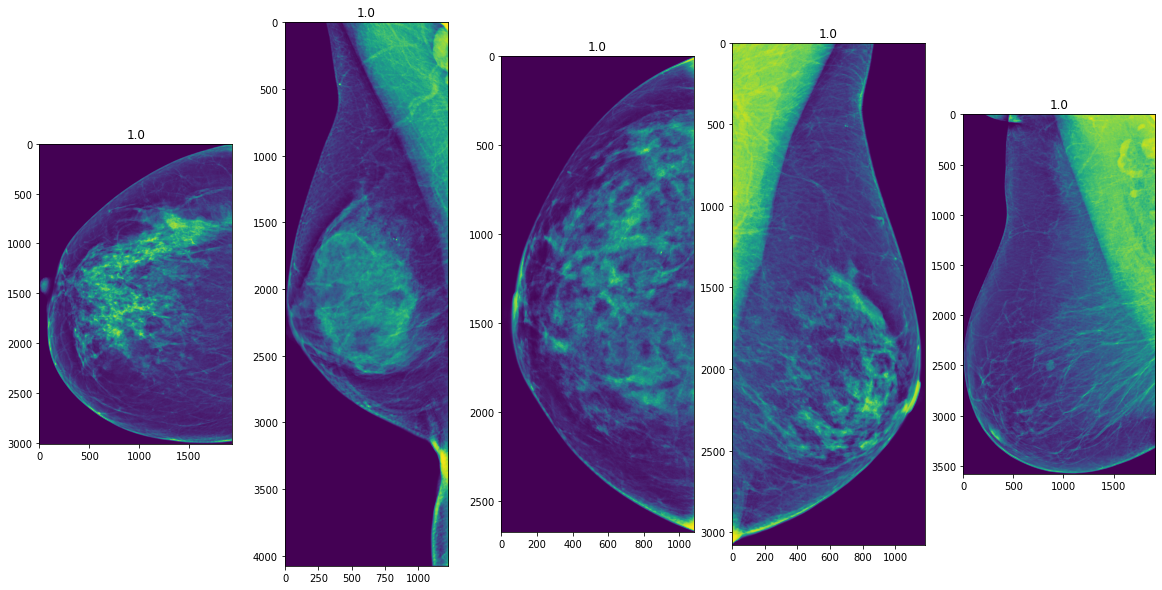

In [ ]:
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img1, img2=crop(imread(os.path.join(img_path,images[ii][0])))
    c_ax.imshow(img1)
    c_ax.set_title(images[ii][1])

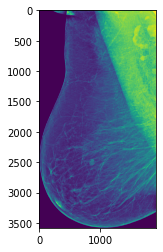

In [ ]:
imshow(img1)

In [ ]:
def truncation_normalization(img):
    """
    Pixel clipped and normalized in breast ROI
    """
    Pmin = np.percentile(img, 5)
    Pmax = np.percentile(img, 99)
    truncated = np.clip(img,Pmin, Pmax)  
    normalized = (truncated - Pmin)/(Pmax - Pmin)
    return normalized

In [ ]:
img_path = '/content/drive/MyDrive/Data_PS3/Data/'

dest_path2 = "/content/drive/MyDrive/Data_PS3/Image_png_normalized/"


img_name= list(train_df.anon_filename)

for img in img_name:
  # Load the DICOM image using pydicom
  image_path = img_path + img
  
  ds = pydicom.dcmread(image_path)

  # Convert the DICOM image to a NumPy array
  img= img.replace("dcm", "png")

  image = ds.pixel_array

  image = cv2.medianBlur(image, 3)

  image, _ = crop(image)

  image = clahe(normalize(image), 1)

  # Convert the NumPy array to a PIL image
  pil_image1 = Image.fromarray(image)

  dest_file1 = dest_path2 + img

  pil_image1.save(dest_file1)


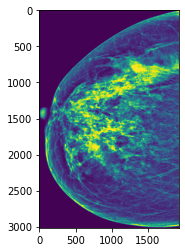

In [ ]:
dest_path1 = "/content/drive/MyDrive/Data_PS3/Image_png_normalized/"
img=img_name[-1].replace("dcm", "png")
image1_path = dest_path1 + img
image= plt.imread(image1_path)
plt.imshow(image)

In [ ]:
image.max()

255

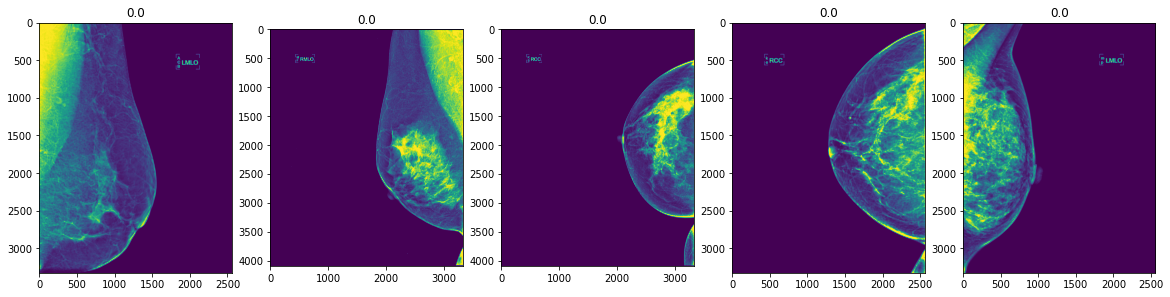

In [ ]:
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img1=truncation_normalization(imread(os.path.join(img_path,images[ii][0])))
    c_ax.imshow(img1)
    c_ax.set_title(images[ii][1])

In [ ]:
def normalize(img):
    lmin = float(img.min())
    lmax = float(img.max())
    return np.floor((img-lmin)/(lmax-lmin)*255.0)

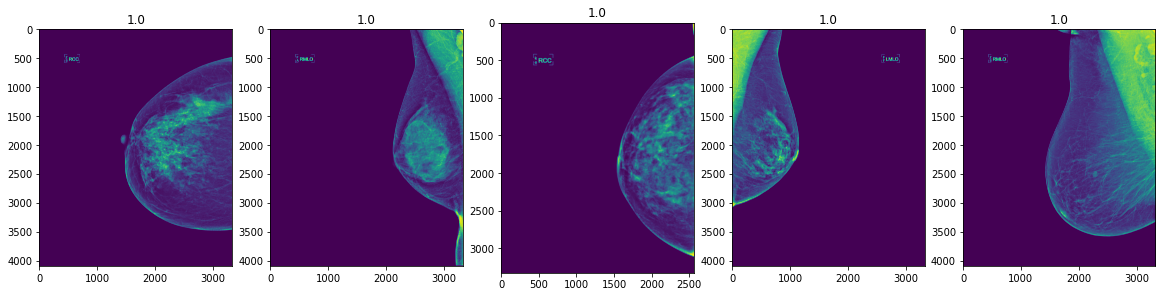

In [ ]:
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img1=normalize(imread(os.path.join(img_path,images[ii][0])))
    c_ax.imshow(img1)
    c_ax.set_title(images[ii][1])

In [ ]:
a=truncation_normalization(img)

In [ ]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

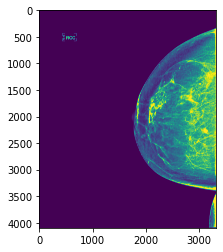

In [ ]:
plt.imshow(a)

In [ ]:
def clahe(img, clip):
    #contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(8,8))
    cl = clahe.apply(np.array(img, dtype=np.uint8))
    return cl

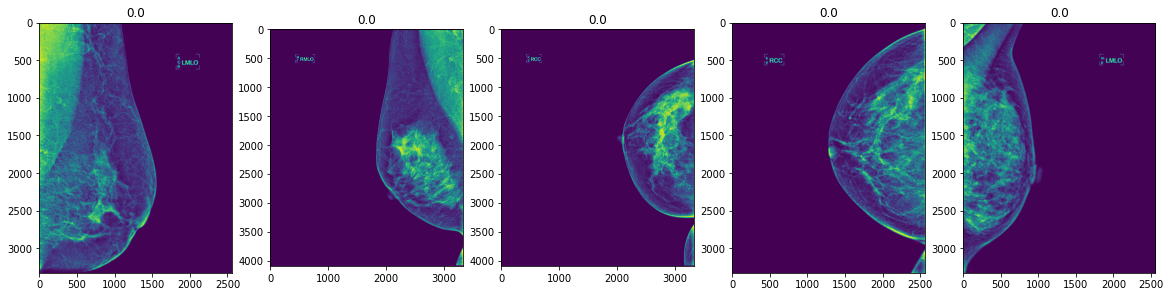

In [ ]:
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img1=clahe(normalize(cv2.medianBlur(imread(os.path.join(img_path,images[ii][0])), 3)), 1)
    c_ax.imshow(img1)
    c_ax.set_title(images[ii][1])

In [ ]:
img1.max()

255

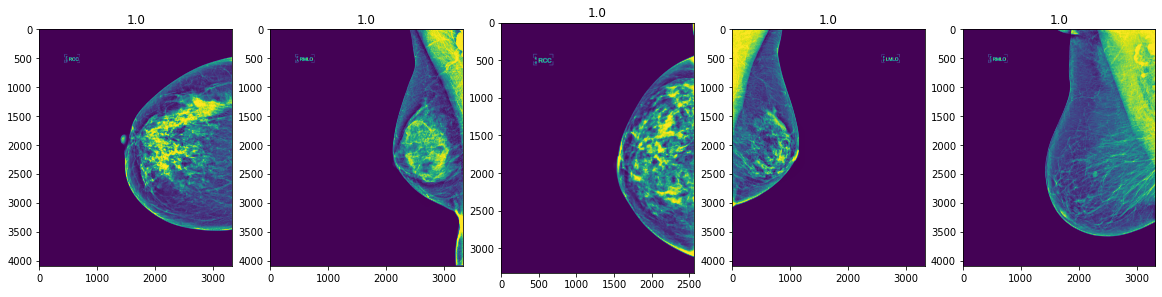

In [ ]:
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img1=clahe(truncation_normalization(imread(os.path.join(img_path,images[ii][0]))), 1)
    c_ax.imshow(img1)
    c_ax.set_title(images[ii][1])

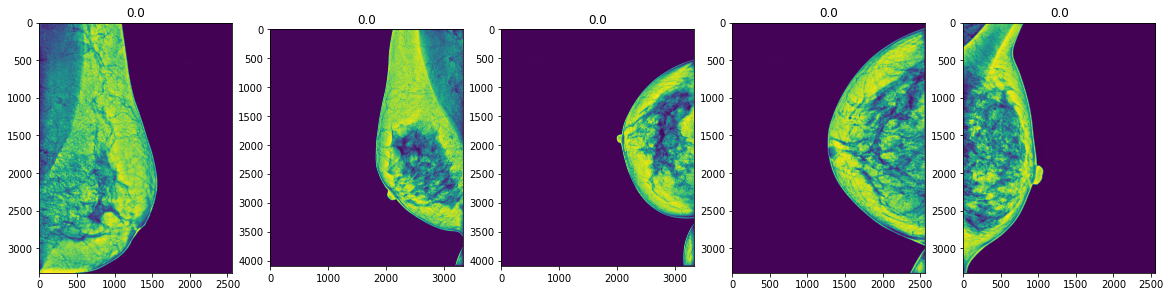

In [ ]:
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img1=clahe(normalize(imread(os.path.join(img_path,images[ii][0]))), 2)
    c_ax.imshow(img1)
    c_ax.set_title(images[ii][1])

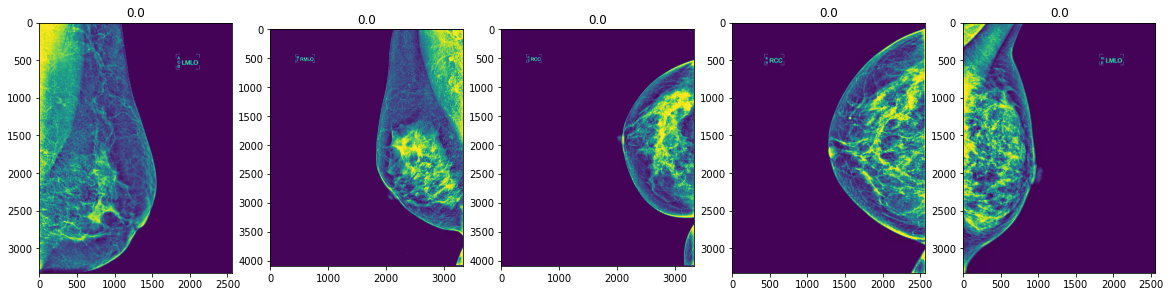

In [ ]:
fig, m_axs = plt.subplots(1, len(images), figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img1=clahe(truncation_normalization(imread(os.path.join(img_path,images[ii][0]))), 2)
    c_ax.imshow(img1)
    c_ax.set_title(images[ii][1])

In [ ]:
b=clahe(a, 1)

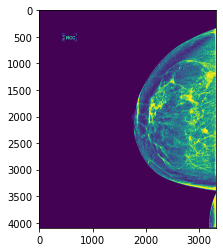

In [ ]:
plt.imshow(b)

In [ ]:
n=clahe(normalize(img),2)

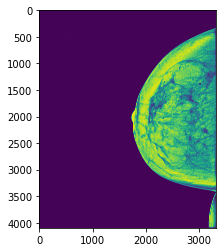

In [ ]:
plt.imshow(n)

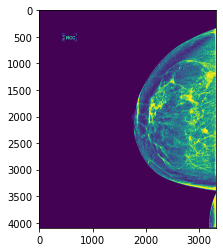

In [ ]:
c=crop(b)
plt.imshow(c[0])

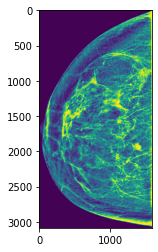

In [ ]:
plt.imshow(clahe(truncation_normalization(crop(img)[0]),2))

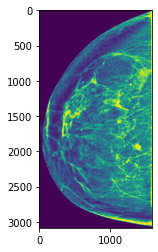

In [ ]:
plt.imshow(clahe(truncation_normalization(crop(img)[0]),1))
plt.savefig('breast')

In [ ]:
from pydicom import dcmread
import matplotlib.pylab as plt

In [ ]:
img_path = '/content/drive/MyDrive/Data_PS3/Data/' + img_name[1]
ds = dcmread(img_path)
pixel_array_numpy = ds.pixel_array
pixel_array_3= cv2.cvtColor(clahe(truncation_normalization(crop(pixel_array_numpy)[0]),1) , cv2.COLOR_GRAY2RGB)

In [ ]:
# Import the necessary libraries
import numpy as np
from skimage import filters, morphology
from skimage.util import invert

# Load the image
image = pixel_array_numpy

# Apply a threshold to create a binary image
threshold = filters.threshold_otsu(image)
binary_image = image > threshold

# Remove small objects from the image
cleaned_image = morphology.remove_small_objects(binary_image, min_size=100)

# Invert the image to create the ROI image
roi_image = invert(cleaned_image)

In [ ]:
def synthesized_images(file_name):
    """
    Merging of truncation_normalization + clahe1 + clahe2
    """
    img_path = '/content/drive/MyDrive/Data_PS3/Data/' + file_name
    ds = dcmread(img_path)
    pixel_array_numpy = ds.pixel_array

    breast, mask = crop(pixel_array_numpy)
    normalization= normalize(breast)
    normalized = truncation_normalization(breast)

    cl1 = clahe(normalized, 1.0)
    cl2 = clahe(normalized, 2.0)

    synthetized = cv2.merge((np.array(normalized*255, dtype=np.uint8),cl1,cl2))
    normalization_3= cv2.merge((normalization, normalization, normalization))
    normalize_3= cv2.merge((normalized, normalized, normalized))
    cl13= cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
    cl23= cv2.cvtColor(cl2, cv2.COLOR_GRAY2RGB)
    breast_3= cv2.cvtColor(breast, cv2.COLOR_GRAY2RGB)

    return breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3

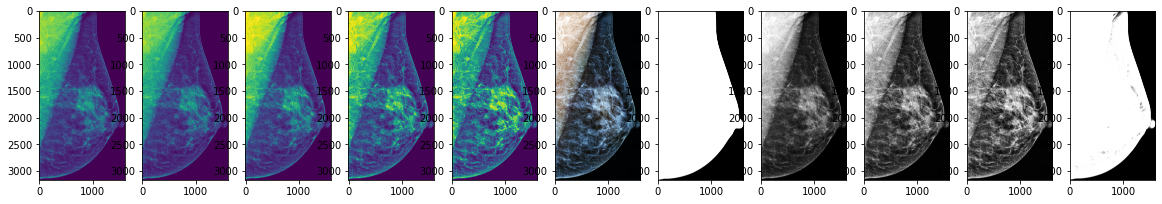

In [ ]:
breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3 = synthesized_images(img_name[1])
C=[breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3]

fig, m_axs = plt.subplots(1, 11, figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img0=C[ii]
    c_ax.imshow(img0)




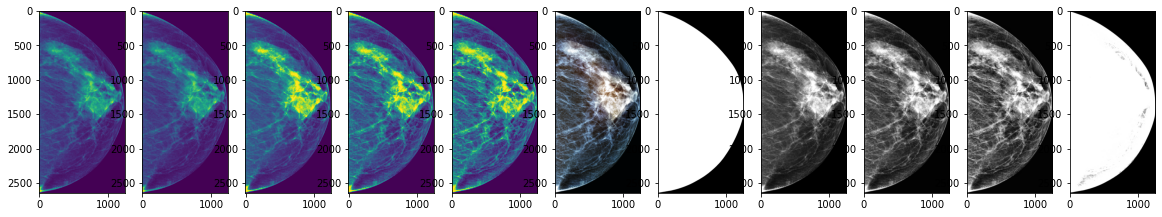

In [ ]:
breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3 = synthesized_images(img_name[-1])
C=[breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3]

fig, m_axs = plt.subplots(1, 11, figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img0=C[ii]
    c_ax.imshow(img0)

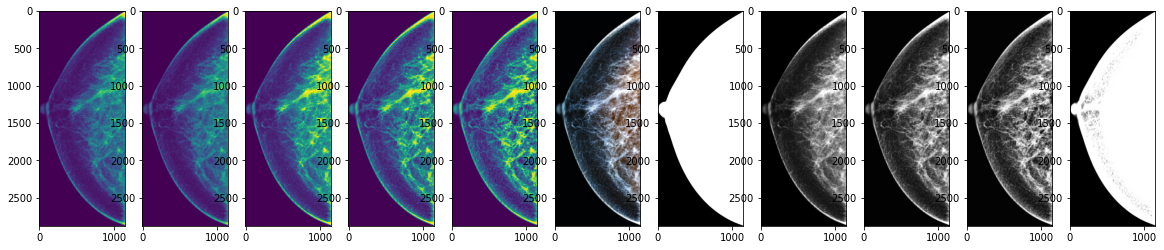

In [ ]:
breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3 = synthesized_images(img_name[2])
C=[breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3]

fig, m_axs = plt.subplots(1, 11, figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img0=C[ii]
    c_ax.imshow(img0)

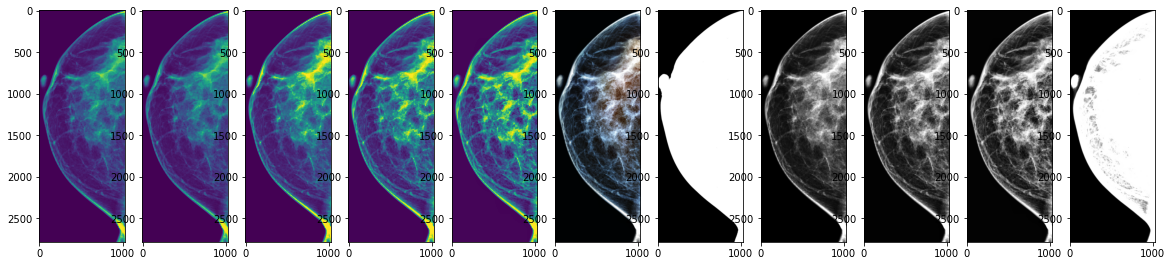

In [ ]:
breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3 = synthesized_images(img_name[-2])
C=[breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3]

fig, m_axs = plt.subplots(1, 11, figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img0=C[ii]
    c_ax.imshow(img0)

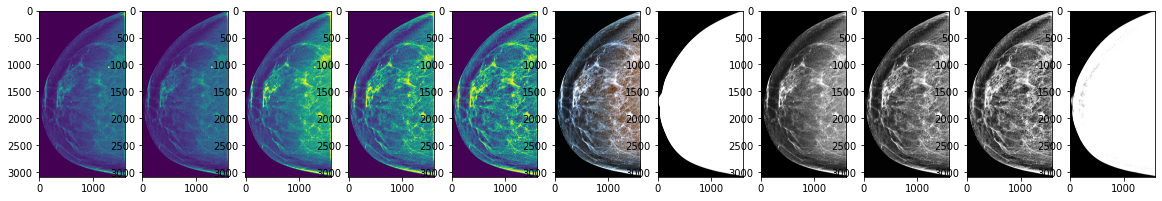

In [ ]:
breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3 = synthesized_images(img_name[-5])
C=[breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3]

fig, m_axs = plt.subplots(1, 11, figsize = (20, 10))
for ii, c_ax in enumerate(m_axs):
    img0=C[ii]
    c_ax.imshow(img0)
plt.show()

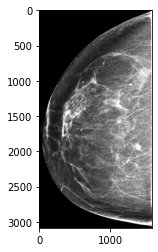

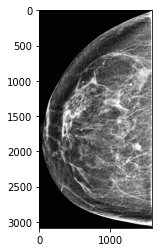

In [ ]:
breast, normalization, normalized, cl1, cl2, synthetized, normalization_3, normalize_3, cl13, cl23, breast_3 = synthesized_images(img_name[-5])
plt.imshow(normalize_3)
plt.show()
plt.imshow(cl13)
plt.show()

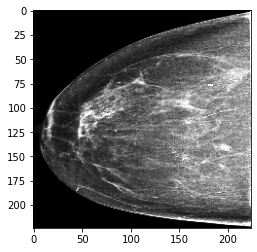

In [ ]:
norm = cv2.resize(normalize_3 , (224,224), interpolation=cv2.INTER_NEAREST)
plt.imshow(norm)

In [ ]:
b=np.expand_dims(a, -1)

In [ ]:
b.shape, a.shape

((2643, 1248, 1), (2643, 1248))

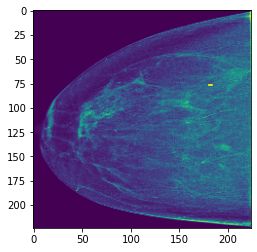

In [ ]:
target_size=(224,224)
#breast, mask = crop(a)
image_array = cv2.resize(breast,  target_size, interpolation=cv2.INTER_NEAREST)  #this returns a 2d array
plt.imshow(image_array)
image_array = np.expand_dims(image_array, -1)
plt.imshow(image_array)
#breast, mask = crop(image_array)
normalized = truncation_normalization(image_array)

#img_test= cv2.cvtColor(normalized, cv2.COLOR_GRAY2RGB)
#cl1 = clahe(normalized, 1.0)
#cl2 = clahe(normalized, 2.0)

synthetized = cv2.merge((normalized, normalized, normalized))


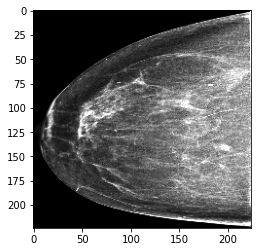

In [ ]:
plt.imshow(synthetized)

In [ ]:
synthetized.shape

(224, 224, 3)

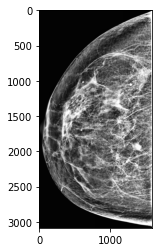

In [ ]:
image_array = cv2.cvtColor(cl2, cv2.COLOR_GRAY2RGB)
plt.imshow(image_array)

In [ ]:
image_array.shape

(3085, 1593, 3)

#### Advanced processing

In [ ]:
import cv2

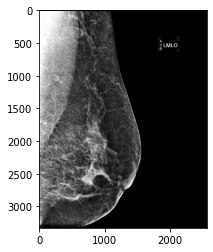

In [ ]:
image_path = img_path + img_name[1]
ds = pydicom.dcmread(image_path)
denoised_img=cv2.medianBlur(ds.pixel_array, 3)
image = clahe(truncation_normalization(denoised_img), 1)
plt.imshow(image, cmap="gray")

In [ ]:
!pip install numpy cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install segmentation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 KB 10.0 MB/s eta 0:00:00


In [ ]:
    # Otsu's thresholding after Gaussian filtering
    im = cv2.GaussianBlur(image,(5,5),0)
    _, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY)

In [ ]:
import segmentation as seg

im = cv2.GaussianBlur(image,(5,5),0)# gaussian blur
segmented, _ = seg.mixture_model(im)#, debug=True) # second return argument is currently unused
labels = seg.watershed(im, segmented)

ValueError: ignored

In [ ]:
# Apply Otsu's thresholding to the image
_, binary_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

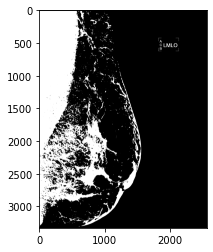

In [ ]:
plt.imshow(binary_img, cmap="gray")

In [ ]:
import cv2
from scipy.spatial import ConvexHull
import numpy as np

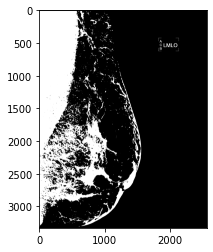

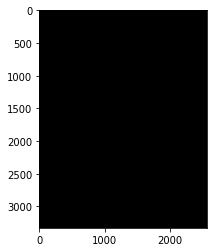

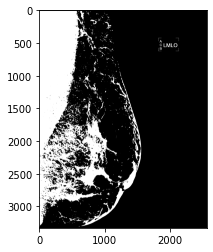

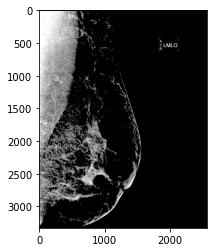

In [ ]:
# Load the binary image (Iβ) and the original gray scale image
gray_img = image.copy()

# Compute the topographic map (Iσ) by finding the four corners of the foreground pixels in the binary image (Iβ)
corners = cv2.goodFeaturesToTrack(binary_img, 50, 0.01, 10)

corners = np.int0(corners)

# Generate the convex hull image (IΔ) using the topographic map (Iσ)
points = []
for corner in corners:
    x, y = corner.ravel()
    points.append([x, y])

for i in points:
    x, y = i
    cv2.circle(binary_img, (x, y), 3, 255, -1)

plt.imshow(binary_img, cmap="gray"), plt.show()

points = np.array(points)
hull = ConvexHull(points)

convex_hull_img = np.zeros_like(binary_img)

for point in points[hull.vertices]:
    convex_hull_img[point[1], point[0]] = 255

plt.imshow(convex_hull_img, cmap="gray")
plt.show()

# Superimpose the convex hull image (IΔ) on the four corners of the binary image (Iβ) to extract the silhouette of the breast body
resultant_img = cv2.addWeighted(binary_img, 1.0, convex_hull_img, 1.0, 0.0)

plt.imshow(resultant_img, cmap="gray")
plt.show()

# Map the pixels of the resultant image (Iδ) with the original gray scale image to acquire the segmented breast profile image (Isτ)
segmented_img = np.zeros_like(gray_img)
for i in range(resultant_img.shape[0]):
    for j in range(resultant_img.shape[1]):
        if resultant_img[i, j] > 0:
            segmented_img[i, j] = gray_img[i, j]

# Save the segmented breast profile image (Isτ) as a new image file
#cv2.imwrite("segmented_breast_profile.png", segmented_img)

plt.imshow(segmented_img, cmap="gray")


#### Extract the breast region from the image